In [1]:
# Import pandas for data manipulation
import pandas as pd
import numpy as np

In [2]:
# Read csv file 
source_file_df = pd.read_csv('weight-height.csv')

In [3]:
# Review the first five rows in source data frame
source_file_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# Understanding the number of entries(rows) and features(columns) in the dataset
source_file_df.shape

(10000, 3)

In [5]:
# Check for missing values in the source data frame
source_file_df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
# Check data distribution between male and female
source_file_df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [7]:
# Create 2 data frame for male and fefefemale
male_df = source_file_df[source_file_df['Gender'] == 'Male'].drop(columns='Gender')
female_df = source_file_df[source_file_df['Gender'] == 'Female'].drop(columns='Gender')

In [8]:
# Check the number of entries in each data frame
print('Male_df: ',male_df.shape[0])
print('Female_df: ',female_df.shape[0])

Male_df:  5000
Female_df:  5000


In [9]:
# Seaborn and matplotlib modules import
import seaborn as sns
from matplotlib import pyplot as plt

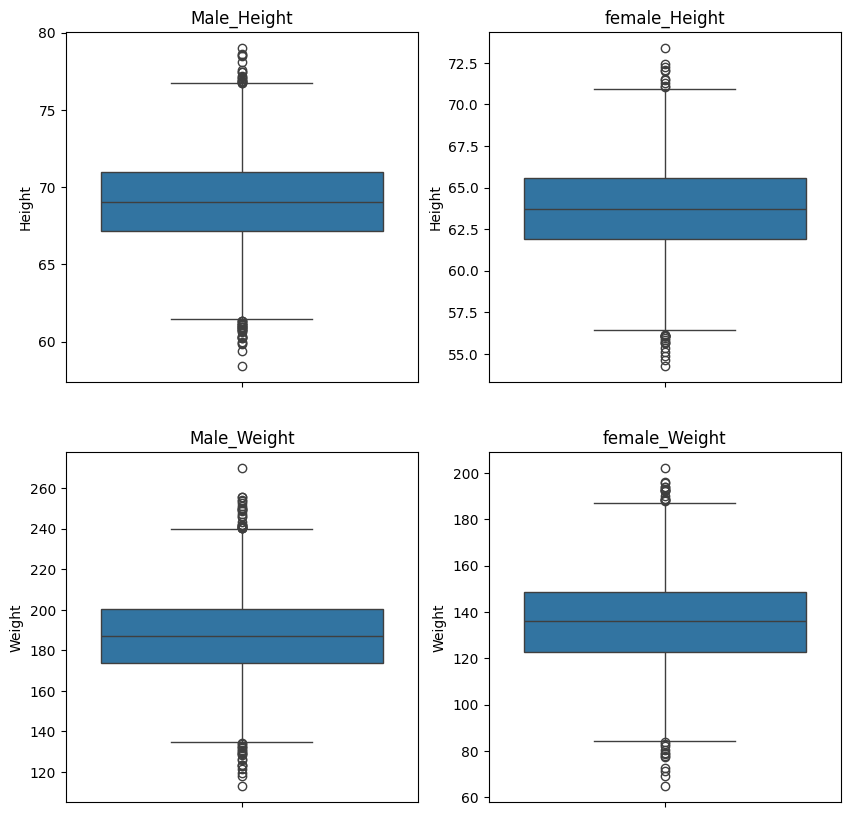

In [10]:
# Seaborn and matplotlib for data visualization
fig,axes = plt.subplots(2, 2,figsize = (10,10))
sns.boxplot(data=male_df['Height'],ax=axes[0,0]) 
axes[0,0].set_title('Male_Height')
sns.boxplot(data=female_df['Height'],ax=axes[0,1]) 
axes[0,1].set_title('female_Height')
sns.boxplot(data=male_df['Weight'],ax=axes[1,0]) 
axes[1,0].set_title('Male_Weight')
sns.boxplot(data=female_df['Weight'],ax=axes[1,1]) 
axes[1,1].set_title('female_Weight')
plt.show()

In [11]:
# Scatter plot
def scatter_plot(X,Y,caption,x_label,y_label):
    plt.scatter(x = X,y = Y)
    plt.title(caption)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

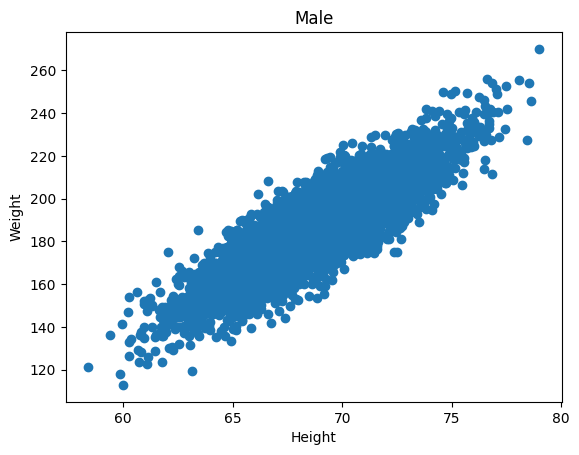

In [12]:
# Plotting data distribution
scatter_plot(male_df['Height'],male_df['Weight'],'Male','Height','Weight')

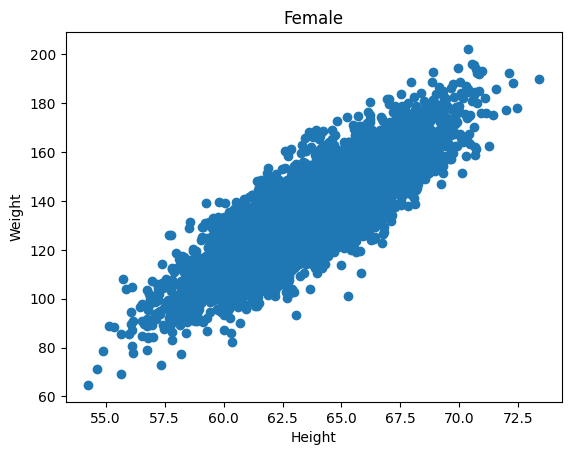

In [13]:
# Plotting female data distribution
scatter_plot(female_df['Height'],female_df['Weight'],'Female','Height','Weight')

In [14]:
# Import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
# Model training and test result evaluation
def linear_regression(X,Y,title,gender):
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
    print('\n'+ title + ' - '+ gender)
    
    model = LinearRegression()

    model.fit(X_train,Y_train)  
    
    print('Test data error %:')
    Y_test_pred = model.predict(X_test)
    print('MSE: ', mean_squared_error(Y_test_pred,Y_test)) 
    print('Test data r2 score:')
    print('r2 _score: ', r2_score(Y_test_pred,Y_test)) 
    return (np.round(mean_squared_error(Y_test_pred,Y_test),2))


In [16]:
# Model inputs with outliers
error_male_with_outlier = linear_regression(male_df[['Height']],male_df['Weight'],'With Outlier','Male')
error_female_with_outlier = linear_regression(female_df[['Height']],female_df['Weight'],'With Outlier','Female')


With Outlier - Male
Test data error %:
MSE:  101.29569749735627
Test data r2 score:
r2 _score:  0.6625289965477305

With Outlier - Female
Test data error %:
MSE:  104.92908599110329
Test data r2 score:
r2 _score:  0.5708150866372496


In [17]:
# import Z score for removing outlier
from scipy.stats import zscore

In [18]:
# Fiter results based on zscore threshold of 3 for male and female
threshold = 3
zscore_male = zscore(male_df)
male_df_outliers = (abs(zscore_male)>threshold).any(axis=1)
z_male_df_filtered = male_df[~male_df_outliers]

zscore_female = zscore(female_df)
female_df_outliers = (abs(zscore_female)>threshold).any(axis=1)
z_female_df_filtered = female_df[~female_df_outliers]

In [19]:
# Model inputs without outliers
z_male_no_outlier = linear_regression(z_male_df_filtered[['Height']],z_male_df_filtered['Weight'],'Without Outlier','Male')
z_female_no_outlier = linear_regression(z_female_df_filtered[['Height']],z_female_df_filtered['Weight'],'Without Outlier','Female')


Without Outlier - Male
Test data error %:
MSE:  95.21167829273153
Test data r2 score:
r2 _score:  0.6693949052672712

Without Outlier - Female
Test data error %:
MSE:  103.96429326265613
Test data r2 score:
r2 _score:  0.6097932575590967


Text(0.5, 1.0, 'Outlier_removed')

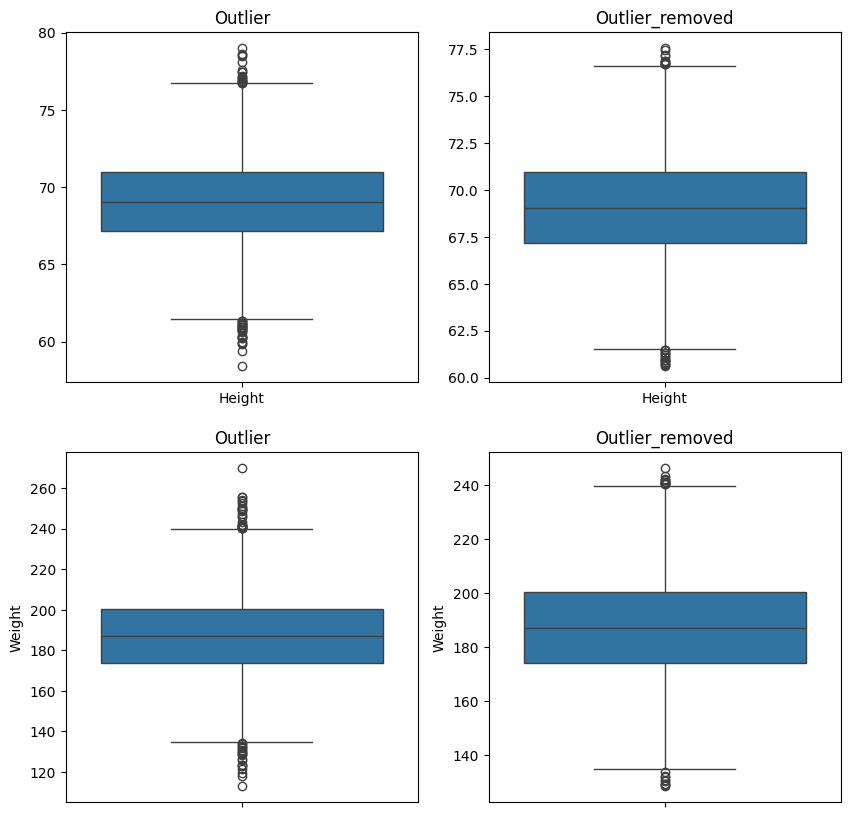

In [20]:
# Visualizing outlier for Male height and weight with and without outliers
fig,axes = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data=male_df[['Height']],ax=axes[0,0])
axes[0,0].set_title('Outlier')
sns.boxplot(data=z_male_df_filtered[['Height']],ax=axes[0,1])
axes[0,1].set_title('Outlier_removed')
sns.boxplot(data=male_df['Weight'],ax=axes[1,0])
axes[1,0].set_title('Outlier')
sns.boxplot(data=z_male_df_filtered['Weight'],ax=axes[1,1])
axes[1,1].set_title('Outlier_removed')

### IQR Method

In [21]:
# Using IQR method to remove outliers for male data frame
q1_male = male_df.quantile(0.25)
q2_male = male_df.quantile(0.75)

# Calculate the range
IQR_height_male = q2_male-q1_male

# Lower and upper bound calculation
lower_bound_male = q1_male - 1.5 * (IQR_height_male)
upper_bound_male = q2_male + 1.5 * (IQR_height_male)

#  Filtered data frame for male
iqr_male_outliers = ((male_df < lower_bound_male) | (male_df > upper_bound_male)).any(axis=1)
iqr_male_filtered = male_df[~iqr_male_outliers]


In [22]:
# Using IQR method to remove outliers for female data frame

q1_female = female_df.quantile(0.25)
q2_female = female_df.quantile(0.75)

# Calculate the range
IQR_height_female = q2_female-q1_female

# Lower and upper bound calculation
lower_bound_female = q1_female - 1.5 * (IQR_height_female)
upper_bound_female = q2_female + 1.5 * (IQR_height_female)

#  Filtered data frame for male
iqr_female_outliers = ((female_df < lower_bound_female) | (female_df > upper_bound_female)).any(axis=1)
iqr_female_filtered = female_df[~iqr_female_outliers]

In [23]:
# Evaluating linear regression model with IQR based dataset
iqr_male_no_outlier = linear_regression(iqr_male_filtered[['Height']],iqr_male_filtered['Weight'],'No Outlier','Male')
iqr_female_no_outlier = linear_regression(iqr_female_filtered[['Height']],iqr_female_filtered['Weight'],'No outlier','Female')


No Outlier - Male
Test data error %:
MSE:  100.43323706551449
Test data r2 score:
r2 _score:  0.6220209839346318

No outlier - Female
Test data error %:
MSE:  104.36225766319244
Test data r2 score:
r2 _score:  0.5769464800281997


In [24]:
# Outliers removed
z_male_outliers_removed = abs((z_male_df_filtered.shape[0])-(male_df.shape[0]))
z_female_outliers_removed = abs((z_female_df_filtered.shape[0])-(female_df.shape[0]))
iqr_male_outliers_removed = abs((iqr_male_filtered.shape[0])-(male_df.shape[0]))
iqr_female_outliers_removed = abs((iqr_female_filtered.shape[0])-(female_df.shape[0]))

In [25]:
# Create a dataframe with results
data = {
    'Case': ['Male- with outlier','Male- without outlier','Female- with outlier','Female- without outlier'],
    'MSE_Z_score':[error_male_with_outlier,z_male_no_outlier,error_female_with_outlier,z_female_no_outlier],
    'MSE_IQR':[error_male_with_outlier,iqr_male_no_outlier,error_female_with_outlier,iqr_female_no_outlier],
    'Z_Outliers':[0,z_male_outliers_removed,0,z_female_outliers_removed],
    'IQR_Outliers':[0,iqr_male_outliers_removed,0,iqr_female_outliers_removed]
}
result_df = pd.DataFrame(data)
result_df

,Case,MSE_Z_score,MSE_IQR,Z_Outliers,IQR_Outliers
0,Male- with outlier,101.30,101.30,0,0
1,Male- without outlier,95.21,100.43,30,69
2,Female- with outlier,104.93,104.93,0,0
3,Female- without outlier,103.96,104.36,20,46
